<a href="https://colab.research.google.com/github/dxspimentel/PUC/blob/main/MVP_Aprender_Conectado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Análise de Dados e Boas Práticas**

Nome: Diego Pimentel <br>
Matrícula: 4052025000258 <br>
Dataset: **Aprender Conectado**

<br>
--- OBSERVAÇÃO IMPORTANTE ---

Este é um Dataset adaptado, devido a Segurança da Informação e Sigilo da Instituição.

------

## Descrição do Problema

Dados relacionados ao projeto *Aprender Conectado*, cujo objetivo é levar internet a escolas com estrutura precária, ou sem estrutura, nas regiões mais afastadas das grandes cidades.<br>
Neste trabalho será desenvolvida uma solução que facilite a identificação de quais escolas foram de fato entregues, sem pendências, dentro do universo de escolas com obras já contratadas.

### Hipóteses do Problema

Cada escola tem a sua particularidade, com isso trabalha com escopo específico.
O escopo de cada projeto é dividido em 3 tipos de obras:<br>
1) Rede Interna<br>
2) Rede Externa<br>
3) Gerador Solar<br>

A questão é analisar se as etapas previstas em cada escola foram concluídas e com isso classificar como **Conectada**.

### Tipo de Problema

Este é um problema de **classificação supervisionada**.<br>
Cada etapa do projeto é classificada de acordo com o status de execução de obra. Uma vez que o escopo esteja totalmente atendido, a escola é classificada como entregue (**Conectada**). Em **df_escopo** existe um atributo chamado **Escola Conectada**, onde as classificações estão divididas em "Sim" ou "Não".

### Seleção de Dados

Para este trabalho considerei duas bases de dados. A primeira com o monitoramento das obras, por projeto, e a segunda informando o escopo a ser considerado para cada escola.<br><br>

A base de projetos está verticalizada, ou seja, os status das etapas estão empilhados. Já a base de escopo já está bem definida, trazendo os escopos em 3 colunas distintas, para cada projeto, além da informação se a escola já está conectada (Sim/Não).

###Atributos do Dataset

O Dataset deste trabalho consiste na união (cruzamento) de duas bases: [1] Projetos e [2] Escopo.<br>

**df_projetos**: possui 7 atributos, com aproximadamente 25 mil linhas.<br>

- **CODCT**: código do contrato
- **PROJETO**: é a chave de identificação da escola contemplada
- **Obra**: etapa considerada no escopo
- **Tipo Obra**: agrupamento da etapa, caso exista
- **RDO**: relatório diário de obra (código da tarefa)
- **STATUS_RDO**: status da tarefa<br>
- **DATA_VALIDACAO_SALA_TECNICA**: data em que a tarefa foi validada

<br>**df_escopo**: possui 10 atributos, com 15.596 linhas (quantidade de escolas contempladas).
- **PROJETO**: é a chave de identificação da escola contemplada
- **Fase**: o programa foi dividido em duas fases (A e B)
- **Região**: é a região do território nacional, referente àquela escola
- **UF**: unidade federativa, referente àquela escola
- **Município**: município do endereço da escola
- **Escopo_RE**: escopo de Rede Interna (Sim ou Não)
- **Escopo_RI**: escopo de Rede Externa (Sim ou Não)
- **Escopo_GS**: escopo de Gerador Solar (Sim ou Não)
- **Energia compart**: informação não relevante
- **Escola Conectada**: validação para as etapas do escopo entregues - classificação  (Sim ou Não)


## Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial das bases para montar o dataset **Escolas Conectadas**.

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# URLs
github_projetos = 'https://raw.githubusercontent.com/dxspimentel/PUC/main/PUC_Db_01_Base_Projetos.csv'
github_escopo = 'https://raw.githubusercontent.com/dxspimentel/PUC/main/PUC_Db_02_Base_Escopo.csv'

In [2]:
# Carregamento da Base de Projetos
df_projetos = pd.read_csv(github_projetos, encoding='latin-1', sep=';')
print('df_projetos carregado com sucesso')

df_projetos carregado com sucesso


In [3]:
# Carregamento da Base de Escopos
df_escopo = pd.read_csv(github_escopo, encoding='latin-1', sep=';')
print('df_escopo carregado com sucesso')

df_escopo carregado com sucesso


### Verificação de df_projetos

In [4]:
df_projetos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25528 entries, 0 to 25527
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   CODCT                        25528 non-null  int64 
 1   PROJETO                      25528 non-null  object
 2   Obra                         25528 non-null  object
 3   Tipo Obra                    25528 non-null  object
 4   RDO                          25528 non-null  object
 5   STATUS_RDO                   25528 non-null  object
 6   DATA_VALIDACAO_SALA_TECNICA  20295 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.4+ MB


In [5]:
df_projetos.head()

,CODCT,PROJETO,Obra,Tipo Obra,RDO,STATUS_RDO,DATA_VALIDACAO_SALA_TECNICA
0,5,21023255,3-INSTALAÇÃO_DE_ACESSO,Rede de Acesso,RDO-00000000001,Aprovado Sala Técnica,3/7/2025 00:00:00
1,5,22013563,3-INSTALAÇÃO_DE_ACESSO,Rede de Acesso,RDO-00000000001,Aprovado Sala Técnica,5/6/2025 00:00:00
2,5,22123024,3-INSTALAÇÃO_DE_ACESSO,Rede de Acesso,RDO-00000000001,Aprovado Sala Técnica,6/6/2025 00:00:00
3,5,22141456,3-INSTALAÇÃO_DE_ACESSO,Rede de Acesso,RDO-00000000001,Aprovado Sala Técnica,3/7/2025 00:00:00
4,5,24011223,3-INSTALAÇÃO_DE_ACESSO,Rede de Acesso,RDO-00000000001,Aprovado Sala Técnica,6/6/2025 00:00:00


In [6]:
df_projetos.describe()

,CODCT
count,25528.000000
mean,4.700682
std,1.473070
min,1.000000
25%,4.000000
50%,4.000000
75%,6.000000
max,7.000000


In [7]:
print("\n--- Contagem de valores únicos por coluna em df_projetos ---")
for col in df_projetos.columns:
    print(f"- {col}: {df_projetos[col].nunique()} valores únicos")


--- Contagem de valores únicos por coluna em df_projetos ---
- CODCT: 7 valores únicos
- PROJETO: 14556 valores únicos
- Obra: 5 valores únicos
- Tipo Obra: 3 valores únicos
- RDO: 102 valores únicos
- STATUS_RDO: 5 valores únicos
- DATA_VALIDACAO_SALA_TECNICA: 234 valores únicos


### Verificação de df_escopo

In [8]:
df_escopo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15596 entries, 0 to 15595
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PROJETO           15596 non-null  int64 
 1   Fase              15596 non-null  object
 2   Região            15596 non-null  object
 3   UF                15596 non-null  object
 4   Município         15596 non-null  object
 5   Escopo_RE         15596 non-null  object
 6   Escopo_RI         15596 non-null  object
 7   Escopo_GS         15596 non-null  object
 8   Energia compart   123 non-null    object
 9   Escola Conectada  15596 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [9]:
df_escopo.head()

,PROJETO,Fase,Região,UF,Município,Escopo_RE,Escopo_RI,Escopo_GS,Energia compart,Escola Conectada
0,12001058,B,Norte,AC,Cruzeiro do Sul,Sim,Sim,Não,NaN,Não
1,12001953,B,Norte,AC,Mâncio Lima,Sim,Sim,Não,NaN,Sim
2,12001996,B,Norte,AC,Mâncio Lima,Sim,Sim,Não,NaN,Não
3,12002003,B,Norte,AC,Mâncio Lima,Sim,Sim,Não,NaN,Não
4,12002054,B,Norte,AC,Mâncio Lima,Sim,Sim,Não,NaN,Não


In [10]:
df_escopo.describe()

,PROJETO
count,1.559600e+04
mean,2.288679e+07
std,9.444828e+06
min,1.100046e+07
25%,1.501865e+07
50%,2.120760e+07
75%,2.906147e+07
max,5.222635e+07


In [11]:
print("\n--- Contagem de valores únicos por coluna em df_escopo ---")
for col in df_escopo.columns:
    print(f"- {col}: {df_escopo[col].nunique()} valores únicos")


--- Contagem de valores únicos por coluna em df_escopo ---
- PROJETO: 15596 valores únicos
- Fase: 2 valores únicos
- Região: 6 valores únicos
- UF: 25 valores únicos
- Município: 1395 valores únicos
- Escopo_RE: 2 valores únicos
- Escopo_RI: 2 valores únicos
- Escopo_GS: 2 valores únicos
- Energia compart: 2 valores únicos
- Escola Conectada: 2 valores únicos


In [12]:
print("\n--- Checando valores da coluna 'Energia compart' ---")

# Verificar os valores únicos e suas contagens antes do tratamento
print("Valores únicos e contagem de 'Energia compart' ANTES do tratamento:")
print(df_escopo['Energia compart'].value_counts(dropna=False)) # dropna=False para incluir NaN


--- Checando valores da coluna 'Energia compart' ---
Valores únicos e contagem de 'Energia compart' ANTES do tratamento:
Energia compart
NaN    15473
Sim      104
S         19
Name: count, dtype: int64


## Tratamento dos Dataframes

Após verificações dos 2 dataframes, identifiquei algumas tratativas necessárias, antes de seguirmos com o trabalho.

### 1. Conversão da coluna PROJETO para tipo string (object)

**Justificativa**
*   Inconsistência de Tipos: A verificação inicial com df.info() mostrou que a coluna PROJETO estava em diferentes tipos de dados entre df_projetos (object) e df_escopo (int64). Para que a operação de junção (merge) entre os dois DataFrames funcione corretamente e sem perda de dados, é mandatório que a coluna chave tenha o mesmo tipo em ambos.
*   Natureza do Dado: PROJETO representa um identificador único de escola/projeto, e identificadores, mesmo que pareçam numéricos, não são usados em cálculos matemáticos. Tratá-los como strings evita problemas de arredondamento, representação de zeros à esquerda e garante que sejam tratados como categorias ou chaves.<br>


**Ação**

*   df_projetos['PROJETO'] = df_projetos['PROJETO'].astype(str)
*   df_escopo['PROJETO'] = df_escopo['PROJETO'].astype(str)

In [13]:
df_projetos['PROJETO'] = df_projetos['PROJETO'].astype(str)
df_escopo['PROJETO'] = df_escopo['PROJETO'].astype(str)
print("Coluna 'PROJETO' em ambos os DataFrames convertida para string (object).")

Coluna 'PROJETO' em ambos os DataFrames convertida para string (object).


### 2. Conversão da coluna DATA_VALIDACAO_SALA_TECNICA para tipo datetime

**Justificativa**

*   Tipo Incorreto: A verificação com df.info() mostrou que a coluna DATA_VALIDACAO_SALA_TECNICA estava como object (string). Embora as datas fossem visíveis em df.head(), elas não podiam ser usadas para operações temporais.
*   Necessidade Analítica: Para realizar qualquer análise de tempo (ex: calcular duração de projetos, identificar projetos concluídos até certa data, ou ordenar eventos cronologicamente), é essencial que a coluna esteja no formato datetime.
*   Valores Ausentes: A coluna possui valores NaN (ausentes), o que indica que nem todos os projetos têm essa data registrada. A conversão com errors='coerce' permite que esses valores ausentes sejam mantidos como NaT (Not a Time), o que é o valor padrão para datas ausentes.<br>


**Ação**

*   df_projetos['DATA_VALIDACAO_SALA_TECNICA'] = pd.to_datetime(df_projetos['DATA_VALIDACAO_SALA_TECNICA'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [14]:
df_projetos['DATA_VALIDACAO_SALA_TECNICA'] = pd.to_datetime(df_projetos['DATA_VALIDACAO_SALA_TECNICA'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
print("Coluna 'DATA_VALIDACAO_SALA_TECNICA' em df_projetos convertida para datetime.")

Coluna 'DATA_VALIDACAO_SALA_TECNICA' em df_projetos convertida para datetime.


### 3. Padronização das colunas de Escopo (Escopo_RE, Escopo_RI, Escopo_GS, Escola Conectada) e conversão para boleano

**Justificativa**

*   Inconsistência de Valores: A análise de value_counts() anterior para estas colunas (Escopo_RE, Escopo_RI, Escopo_GS) indicou 4 valores únicos, quando o esperado seriam apenas "Sim" e "Não". Isso sugere a presença de variações como capitalização diferente ("sim", "SIM"), espaços em branco, ou talvez NaNs ou outros valores inesperados.
*   Necessidade Analítica: Para que essas colunas possam ser usadas como flags binárias (True/False ou 1/0) na análise e na engenharia de features para o modelo de classificação, é crucial que seus valores sejam padronizados para uma representação consistente de "Sim" ou "Não".<br>

**Ação**

Padronizar "S" e "N" para "Sim" e "Não" e depois converter para *true* e *false*.

*   for col in ['Escopo_RE', 'Escopo_RI', 'Escopo_GS', 'Escola Conectada']:<br>
    temp_col = df_escopo[col].astype(str).str.strip().str.capitalize()<br>
    temp_col = temp_col.replace({'S': 'Sim', 'N': 'Não'})<br>
    df_escopo[col] = temp_col.apply(lambda x: True if x == 'Sim' else False)
    

In [15]:
import pandas as pd

print("\n--- Padronização das colunas de Escopo e conversão para BOLEANO (CORRIGIDO) ---")
for col in ['Escopo_RE', 'Escopo_RI', 'Escopo_GS', 'Escola Conectada']:
    # 1. Converte para string, remove espaços e capitaliza
    temp_col = df_escopo[col].astype(str).str.strip().str.capitalize()

    # 2. Substitui 'S' por 'Sim' e 'N' por 'Não'
    temp_col = temp_col.replace({'S': 'Sim', 'N': 'Não'})

    # 3. Mapeia 'Sim' para True e todo restante para False
    df_escopo[col] = temp_col.apply(lambda x: True if x == 'Sim' else False)

    print(f"Coluna '{col}' padronizada e convertida para True/False. Novas contagens:")
    print(df_escopo[col].value_counts(dropna=False))

print("\n--- Padronização das colunas de Escopo concluída! ---")


--- Padronização das colunas de Escopo e conversão para BOLEANO (CORRIGIDO) ---
Coluna 'Escopo_RE' padronizada e convertida para True/False. Novas contagens:
Escopo_RE
True     15431
False      165
Name: count, dtype: int64
Coluna 'Escopo_RI' padronizada e convertida para True/False. Novas contagens:
Escopo_RI
True     15582
False       14
Name: count, dtype: int64
Coluna 'Escopo_GS' padronizada e convertida para True/False. Novas contagens:
Escopo_GS
False    14290
True      1306
Name: count, dtype: int64
Coluna 'Escola Conectada' padronizada e convertida para True/False. Novas contagens:
Escola Conectada
False    11442
True      4154
Name: count, dtype: int64

--- Padronização das colunas de Escopo concluída! ---


### 4. Conversão da coluna CODCT para tipo string (object)

**Justificativa**

*   Apesar de ser numérica, o número extremamente baixo de valores únicos para uma coluna que representa um "Código de Contrato" indica que ela é uma variável categórica e não uma variável para a qual operações matemáticas (soma, média, etc.) fazem sentido. Manter como int64 pode levar a interpretações errôneas ou a um uso inadequado em modelos. Converter para object (string) é a prática recomendada para identificadores ou variáveis categóricas discretas que não são ordinais. Optar por object é seguro e flexível.<br>

**Ação**
*   df_projetos['CODCT'] = df_projetos['CODCT'].astype(str)

In [16]:
df_projetos['CODCT'] = df_projetos['CODCT'].astype(str)
print("Coluna 'CODCT' em df_projetos convertida para string (object).")

Coluna 'CODCT' em df_projetos convertida para string (object).


###5. Padronização do agrupamento na coluna **df_projetos['Tipo Obra']**

**Justificativa**

*   Esse atributo contem os valores *Rede Interna*, *Rede de Acesso*, *Projeto Especial*, *Gerador Solar* e *Aceitação Final*. Será necessário substituir o termo *Rede de Acesso* para *Rede Externa*, com objetivo de otimizar a validação desta etapa da obra, levando o escopo em consideração.<br>

**Ação**
*   df_projetos['Tipo Obra'] = df_projetos['Tipo Obra'].replace('Rede de Acesso', 'Rede Externa')

In [17]:
df_projetos['Tipo Obra'] = df_projetos['Tipo Obra'].replace('Rede de Acesso', 'Rede Externa')
print("Substituição concluída em 'Tipo Obra'.")

Substituição concluída em 'Tipo Obra'.


### 6. Padronização do atributo **df_projetos['STATUS_RDO']**

**Justificativa**<br>
*   O atributo pode conter espaços desnecessários. Por isso é uma boa prátiva remover qualquer espaço indesejado, pois esse atributo está diretamente ligado a validação de conclusão da etapa.

**Ação**<br>
*   df_projetos['STATUS_RDO'] = df_projetos['STATUS_RDO'].astype(str).str.strip()

In [18]:
print("\n--- Aplicando tratamento: Padronizando 'STATUS_RDO' em df_projetos ---")
df_projetos['STATUS_RDO'] = df_projetos['STATUS_RDO'].astype(str).str.strip()
print("Coluna 'STATUS_RDO' padronizada (espaços removidos).")


--- Aplicando tratamento: Padronizando 'STATUS_RDO' em df_projetos ---
Coluna 'STATUS_RDO' padronizada (espaços removidos).


###7. Remoção da coluna **df_escopo['Energia compart']**

**Justificativa**<br>
*   A coluna é irrelevante para a análise.

**Ação**<br>
*   df_escopo = df_escopo.drop(columns=['Energia compart'])

In [19]:
print("\n--- Removendo a coluna 'Energia compart' de df_escopo ---")
df_escopo = df_escopo.drop(columns=['Energia compart'])
print("Coluna 'Energia compart' removida com sucesso.")
print(f"Novas colunas em df_escopo: {df_escopo.columns.tolist()}")


--- Removendo a coluna 'Energia compart' de df_escopo ---
Coluna 'Energia compart' removida com sucesso.
Novas colunas em df_escopo: ['PROJETO', 'Fase', 'Região', 'UF', 'Município', 'Escopo_RE', 'Escopo_RI', 'Escopo_GS', 'Escola Conectada']


### Verificação dos DataFrames após correções

Recomendado checar se todas as etapas de tratamento dos DataFrames funcionaram.

**DataFrame Projetos**

In [20]:
print("\n--- Informações de df_projetos APÓS TODOS OS TRATAMENTOS ---")
df_projetos.info()
print("\n--- Primeiras 5 linhas de df_projetos APÓS TODOS OS TRATAMENTOS ---")
print(df_projetos.head())
print("\n--- Contagem de valores únicos por coluna em df_projetos ---")
for col in df_projetos.columns:
    print(f"- {col}: {df_projetos[col].nunique()} valores únicos")
print("\n--- Contagem de valores para 'Tipo Obra' (df_projetos) APÓS TRATAMENTO---")
print(df_projetos['Tipo Obra'].value_counts(dropna=False))

print("\n--- Contagem de valores para 'STATUS_RDO' (df_projetos) ---")
print(df_projetos['STATUS_RDO'].value_counts(dropna=False))


--- Informações de df_projetos APÓS TODOS OS TRATAMENTOS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25528 entries, 0 to 25527
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CODCT                        25528 non-null  object        
 1   PROJETO                      25528 non-null  object        
 2   Obra                         25528 non-null  object        
 3   Tipo Obra                    25528 non-null  object        
 4   RDO                          25528 non-null  object        
 5   STATUS_RDO                   25528 non-null  object        
 6   DATA_VALIDACAO_SALA_TECNICA  20295 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 1.4+ MB

--- Primeiras 5 linhas de df_projetos APÓS TODOS OS TRATAMENTOS ---
  CODCT   PROJETO                    Obra     Tipo Obra              RDO  \
0     5  21023255  3-INSTALAÇÃO_DE_ACESSO

**DataFrame Escopo**

In [21]:
print("\n\n--- Informações de df_escopo APÓS TODOS OS TRATAMENTOS ---")
df_escopo.info()
print("\n--- Primeiras 5 linhas de df_escopo APÓS TODOS OS TRATAMENTOS ---")
print(df_escopo.head())
print("\n--- Contagem de valores únicos por coluna em df_escopo ---")
for col in df_escopo.columns:
    print(f"- {col}: {df_escopo[col].nunique()} valores únicos")

print("\n--- Contagem de valores para 'Escopo_RE' (df_escopo) ---")
print(df_escopo['Escopo_RE'].value_counts(dropna=False))
print("\n--- Contagem de valores para 'Escopo_RI' (df_escopo) ---")
print(df_escopo['Escopo_RI'].value_counts(dropna=False))
print("\n--- Contagem de valores para 'Escopo_GS' (df_escopo) ---")
print(df_escopo['Escopo_GS'].value_counts(dropna=False))



--- Informações de df_escopo APÓS TODOS OS TRATAMENTOS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15596 entries, 0 to 15595
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PROJETO           15596 non-null  object
 1   Fase              15596 non-null  object
 2   Região            15596 non-null  object
 3   UF                15596 non-null  object
 4   Município         15596 non-null  object
 5   Escopo_RE         15596 non-null  bool  
 6   Escopo_RI         15596 non-null  bool  
 7   Escopo_GS         15596 non-null  bool  
 8   Escola Conectada  15596 non-null  bool  
dtypes: bool(4), object(5)
memory usage: 670.3+ KB

--- Primeiras 5 linhas de df_escopo APÓS TODOS OS TRATAMENTOS ---
    PROJETO Fase Região  UF        Município  Escopo_RE  Escopo_RI  Escopo_GS  \
0  12001058    B  Norte  AC  Cruzeiro do Sul       True       True      False   
1  12001953    B  Norte  AC      Mâncio Lima 

## Cruzamento das bases (Merge)

O cruzamento é necessário para comparar o que a escola prevê no escopo (**df_escopo**) com o que já foi executado de fato (**df_projetos**).
<br><BR>
Vale lembrar que em **df_projetos**, a evolução das etapas estão em linhas diferentes, ou seja, o mesmo projeto pode ter mais de uma etapa para seguir e cada etapa vai estar em linhas diferentes, com os respectivos *STATUS_RDO*.
<br><br>
Dito isto, o melhor a se fazer é manter apenas uma linha de cada projeto e criar colunas para identificar os status de cada etapa. Nesse caso, vamos criar colunas com valores binários para apontar o que precisamos em cada etapa (0 = não concluída, 1 = concluída).  


In [22]:
# --- 1. Criando a 'Concluido_Flag' em df_projetos ---
print("\n--- Criando 'Concluido_Flag' em df_projetos: 'Aprovado Sala Técnica' = Concluído ---")

# A 'Concluido_Flag' será True se STATUS_RDO for 'Aprovado Sala Técnica', e False caso contrário.
df_projetos['Concluido_Flag'] = df_projetos['STATUS_RDO'].apply(lambda x: x == 'Aprovado Sala Técnica')

print("Coluna 'Concluido_Flag' criada. Primeiras linhas de df_projetos com a nova flag:")
print(df_projetos[['PROJETO', 'Tipo Obra', 'STATUS_RDO', 'Concluido_Flag']].head())
print("\nContagem de valores para 'Concluido_Flag':")
print(df_projetos['Concluido_Flag'].value_counts(dropna=False))


--- Criando 'Concluido_Flag' em df_projetos: 'Aprovado Sala Técnica' = Concluído ---
Coluna 'Concluido_Flag' criada. Primeiras linhas de df_projetos com a nova flag:
    PROJETO     Tipo Obra             STATUS_RDO  Concluido_Flag
0  21023255  Rede Externa  Aprovado Sala Técnica            True
1  22013563  Rede Externa  Aprovado Sala Técnica            True
2  22123024  Rede Externa  Aprovado Sala Técnica            True
3  22141456  Rede Externa  Aprovado Sala Técnica            True
4  24011223  Rede Externa  Aprovado Sala Técnica            True

Contagem de valores para 'Concluido_Flag':
Concluido_Flag
True     20003
False     5525
Name: count, dtype: int64


In [23]:
# --- 2. Preparando df_projetos: Agregando status por PROJETO e Tipo Obra (Pivotamento) ---
print("\n--- Preparando df_projetos: Agregando status por PROJETO e Tipo Obra ---")

# Pivotar para ter um status de conclusão por tipo de obra para cada projeto
df_projetos_pivot = df_projetos.pivot_table(
    index='PROJETO',
    columns='Tipo Obra', # usando a coluna 'Tipo Obra' do df_projetos
    values='Concluido_Flag',
    aggfunc='max', # usando 'max' para Booleanos: se *qualquer* RDO daquele tipo de obra está 'Aprovado Sala Técnica', o flag será True
    fill_value=False # Preenche NaN (projetos sem aquele tipo de obra) com False
)

# Renomear as colunas para um formato mais claro (Ex: Rede_Externa_OK)
# Lidar com espaços nos nomes das colunas pivotadas (ex: 'Rede Externa' vira 'Rede_Externa')
df_projetos_pivot.columns = [f'{col.replace(" ", "_")}_OK' for col in df_projetos_pivot.columns]
df_projetos_pivot = df_projetos_pivot.reset_index() # Reseta o index 'PROJETO' para virar uma coluna comum

# Garantir que as novas colunas de status sejam do tipo booleano (podem vir como object após o pivot_table)
for col in df_projetos_pivot.columns:
    if df_projetos_pivot[col].dtype == 'object' and df_projetos_pivot[col].isin([True, False]).all():
        df_projetos_pivot[col] = df_projetos_pivot[col].astype(bool)


print("df_projetos agregado e pivotado para status de conclusão.")
print("Primeiras 5 linhas de df_projetos_pivot:")
print(df_projetos_pivot.head())
print("\nInformações de df_projetos_pivot:")
df_projetos_pivot.info()


--- Preparando df_projetos: Agregando status por PROJETO e Tipo Obra ---
df_projetos agregado e pivotado para status de conclusão.
Primeiras 5 linhas de df_projetos_pivot:
    PROJETO  Gerador_Solar_OK  Rede_Externa_OK  Rede_Interna_OK
0  11000465             False            False             True
1  11000562             False             True             True
2  11000589             False             True             True
3  11001070             False            False             True
4  11001186             False            False             True

Informações de df_projetos_pivot:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14556 entries, 0 to 14555
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PROJETO           14556 non-null  object
 1   Gerador_Solar_OK  14556 non-null  bool  
 2   Rede_Externa_OK   14556 non-null  bool  
 3   Rede_Interna_OK   14556 non-null  bool  
dtypes: bool(3), object(

In [24]:
## Realizando o merge de df_escopo com df_projetos_pivot para criar df_final**

#Este é o passo que irá juntar todas as informações tratadas e criar o DataFrame 'df_final', necessário para os plots e análises subsequentes.

print("\n--- Realizando o merge de df_escopo com df_projetos_pivot para criar df_final ---")
df_final = pd.merge(df_escopo, df_projetos_pivot, on='PROJETO', how='left')

# Preencher quaisquer NaNs nas novas colunas de status (criadas pelo merge) com False
status_cols_final = [col for col in df_final.columns if col.endswith('_OK')]
for col in status_cols_final:
    if df_final[col].isnull().any(): # Verifica se há NaNs na coluna
        df_final[col] = df_final[col].fillna(False)
        # Depois de preencher, garantir que o dtype seja bool
        df_final[col] = df_final[col].astype(bool)

print("\nMerge concluído. Primeiras 5 linhas do DataFrame final (df_final):")
print(df_final.head())
print("\nInformações do DataFrame final (df_final):")
df_final.info()

print("\n--- Verificando a distribuição da coluna 'Escola Conectada' no df_final ---")
print(df_final['Escola Conectada'].value_counts(dropna=False))

print("\n--- Verificando a distribuição das novas colunas de status no df_final ---")
for col in status_cols_final:
    print(f"\n{col}:")
    print(df_final[col].value_counts(dropna=False))

print("\n--- df_final pronto para a Etapa_ML e plots! ---")


--- Realizando o merge de df_escopo com df_projetos_pivot para criar df_final ---

Merge concluído. Primeiras 5 linhas do DataFrame final (df_final):
    PROJETO Fase Região  UF        Município  Escopo_RE  Escopo_RI  Escopo_GS  \
0  12001058    B  Norte  AC  Cruzeiro do Sul       True       True      False   
1  12001953    B  Norte  AC      Mâncio Lima       True       True      False   
2  12001996    B  Norte  AC      Mâncio Lima       True       True      False   
3  12002003    B  Norte  AC      Mâncio Lima       True       True      False   
4  12002054    B  Norte  AC      Mâncio Lima       True       True      False   

   Escola Conectada  Gerador_Solar_OK  Rede_Externa_OK  Rede_Interna_OK  
0             False             False            False             True  
1              True             False             True             True  
2             False             False            False             True  
3             False             False            False            

/tmp/ipython-input-24-274650072.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_final[col].fillna(False)
/tmp/ipython-input-24-274650072.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_final[col].fillna(False)
/tmp/ipython-input-24-274650072.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

In [25]:
import pandas as pd # Garanta que pandas está importado

print("\n--- Padronizando colunas de Escopo para tipo booleano (True/False) ---")

# Colunas de escopo que precisam ser convertidas para bool
escopo_cols_to_convert = ['Escopo_RE', 'Escopo_RI', 'Escopo_GS']

for col in escopo_cols_to_convert:
    # Garante que a conversão de 0/1 para False/True seja feita corretamente
    df_final[col] = df_final[col].astype(bool)
    print(f"Coluna '{col}' convertida para tipo bool.")

print("\nPadronização concluída. Verificando o df_final:")
print("Primeiras 5 linhas do DataFrame final (df_final) após padronização:")
print(df_final.head())
print("\nInformações do DataFrame final (df_final) após padronização:")
df_final.info()

print("\n--- Padronização de tipos de dados concluída! ---")


--- Padronizando colunas de Escopo para tipo booleano (True/False) ---
Coluna 'Escopo_RE' convertida para tipo bool.
Coluna 'Escopo_RI' convertida para tipo bool.
Coluna 'Escopo_GS' convertida para tipo bool.

Padronização concluída. Verificando o df_final:
Primeiras 5 linhas do DataFrame final (df_final) após padronização:
    PROJETO Fase Região  UF        Município  Escopo_RE  Escopo_RI  Escopo_GS  \
0  12001058    B  Norte  AC  Cruzeiro do Sul       True       True      False   
1  12001953    B  Norte  AC      Mâncio Lima       True       True      False   
2  12001996    B  Norte  AC      Mâncio Lima       True       True      False   
3  12002003    B  Norte  AC      Mâncio Lima       True       True      False   
4  12002054    B  Norte  AC      Mâncio Lima       True       True      False   

   Escola Conectada  Gerador_Solar_OK  Rede_Externa_OK  Rede_Interna_OK  
0             False             False            False             True  
1              True             False 

##Visualização dos dados

Distribuição da Variável Alvo (Escola Conectada)

Plot 1: Distribuição da Variável Alvo (Corrigido Definitivamente)


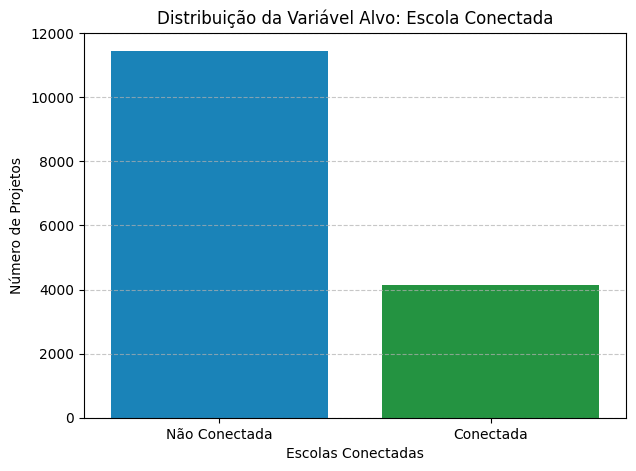

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Plot 1: Distribuição da Variável Alvo (Corrigido Definitivamente)")

# Definindo a paleta de cores personalizada com chaves BOOLEANAS (False/True)
custom_palette = {False: '#008BD2',  # Azul para 'Não Conectada' (False)
                  True: '#12A538'}   # Verde para 'Conectada' (True)

plt.figure(figsize=(7, 5))
sns.countplot(x='Escola Conectada', hue='Escola Conectada', data=df_final, palette=custom_palette, legend=False)
plt.title('Distribuição da Variável Alvo: Escola Conectada')
plt.xlabel('Escolas Conectadas')
plt.ylabel('Número de Projetos')
plt.xticks(ticks=[0, 1], labels=['Não Conectada', 'Conectada'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Relação entre Variáveis de Escopo e a Variável Alvo

Plot 2: Relação Escopo vs. Escola Conectada


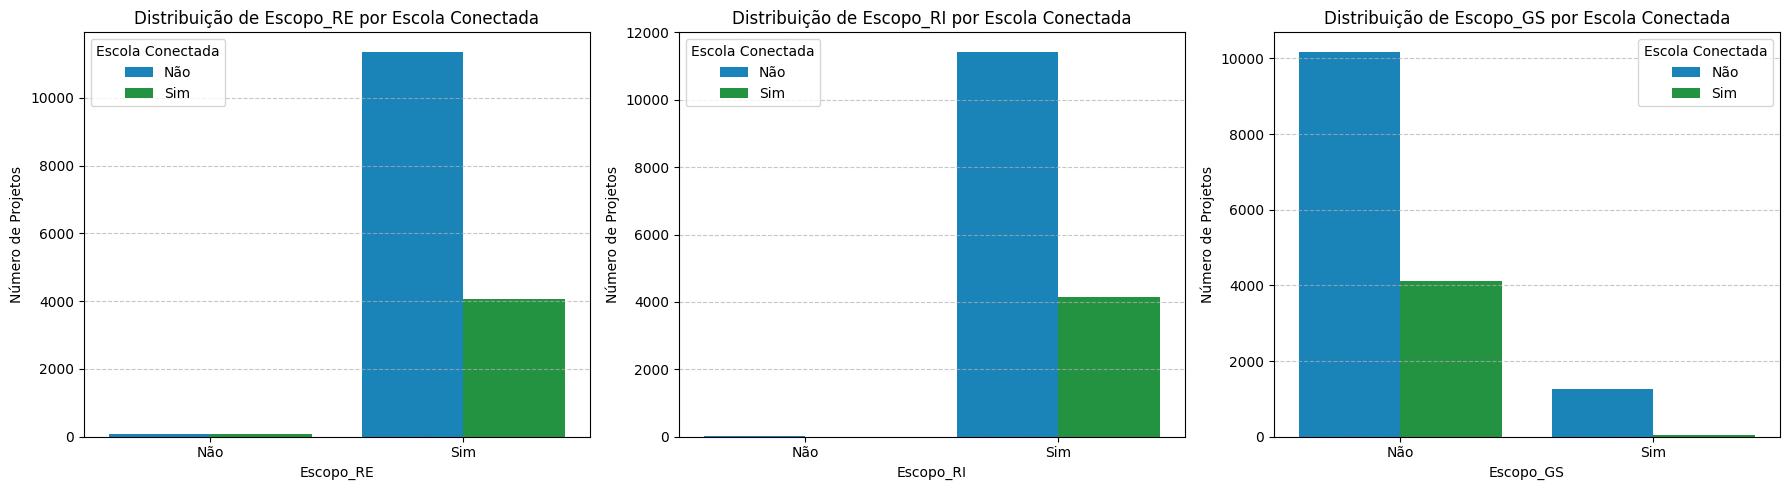

In [27]:
print("Plot 2: Relação Escopo vs. Escola Conectada")

scope_cols = ['Escopo_RE', 'Escopo_RI', 'Escopo_GS']

# Definindo a paleta de cores personalizada
custom_palette = {0: '#008BD2',  # Azul 'Não Conectada'
                  1: '#12A538'} # Verde 'Conectada'

plt.figure(figsize=(18, 5))
for i, col in enumerate(scope_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue='Escola Conectada', data=df_final, palette=custom_palette)
    plt.title(f'Distribuição de {col} por Escola Conectada')
    plt.xlabel(col)
    plt.ylabel('Número de Projetos')
    plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
    plt.legend(title='Escola Conectada', labels=['Não', 'Sim'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Relação entre Variáveis de Status de Conclusão e a Variável Alvo

Plot 3: Relação Status de Conclusão vs. Escola Conectada (Cores Ajustadas)


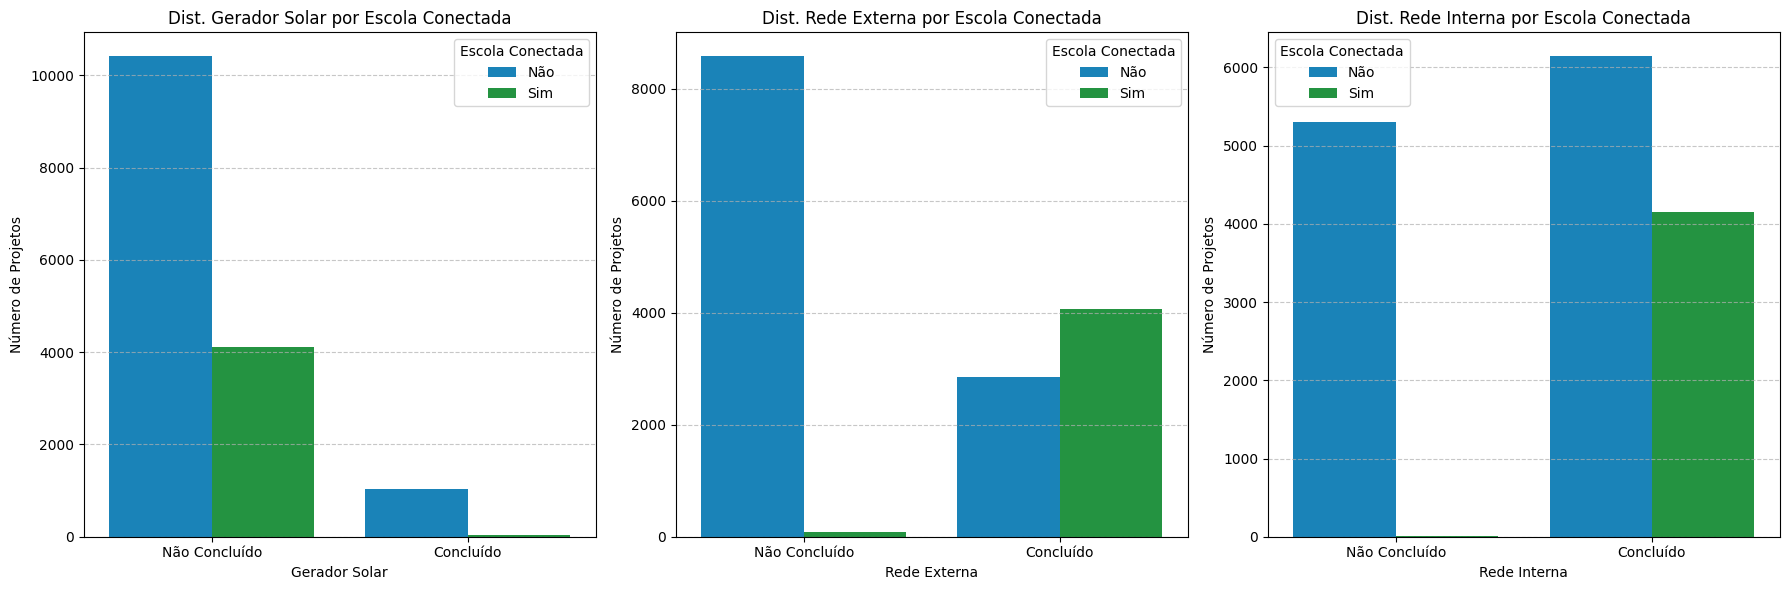

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Plot 3: Relação Status de Conclusão vs. Escola Conectada (Cores Ajustadas)")

# Definindo a paleta de cores personalizada
custom_palette = {False: '#008BD2',  # Azul para 'Não Conectada'
                  True: '#12A538'}   # Verde para 'Conectada'

status_cols = [col for col in df_final.columns if col.endswith('_OK')]


# Verificando se a lista de colunas não está vazia antes de plotar
if not status_cols:
    print("Nenhuma coluna de status com '_OK' encontrada no df_final. Verifique os nomes das colunas.")
else:
    plt.figure(figsize=(len(status_cols) * 6, 6)) # Ajusta o tamanho da figura dinamicamente

    for i, col in enumerate(status_cols):
        plt.subplot(1, len(status_cols), i + 1)
        sns.countplot(x=col, hue='Escola Conectada', data=df_final, palette=custom_palette)

        # Ajuste o título e labels para refletir os nomes _OK
        title_label = col.replace("_OK", "").replace("_", " ")
        plt.title(f'Dist. {title_label} por Escola Conectada')
        plt.xlabel(title_label)
        plt.ylabel('Número de Projetos')

        # As colunas X (status_cols)
        plt.xticks(ticks=[0, 1], labels=['Não Concluído', 'Concluído'])
        plt.legend(title='Escola Conectada', labels=['Não', 'Sim'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

Relação entre Variáveis Categóricas Chave (Fase, Região, UF) e a Variável Alvo


Plot 4a: Relação Fase e Região vs. Escola Conectada (Cores Ajustadas)


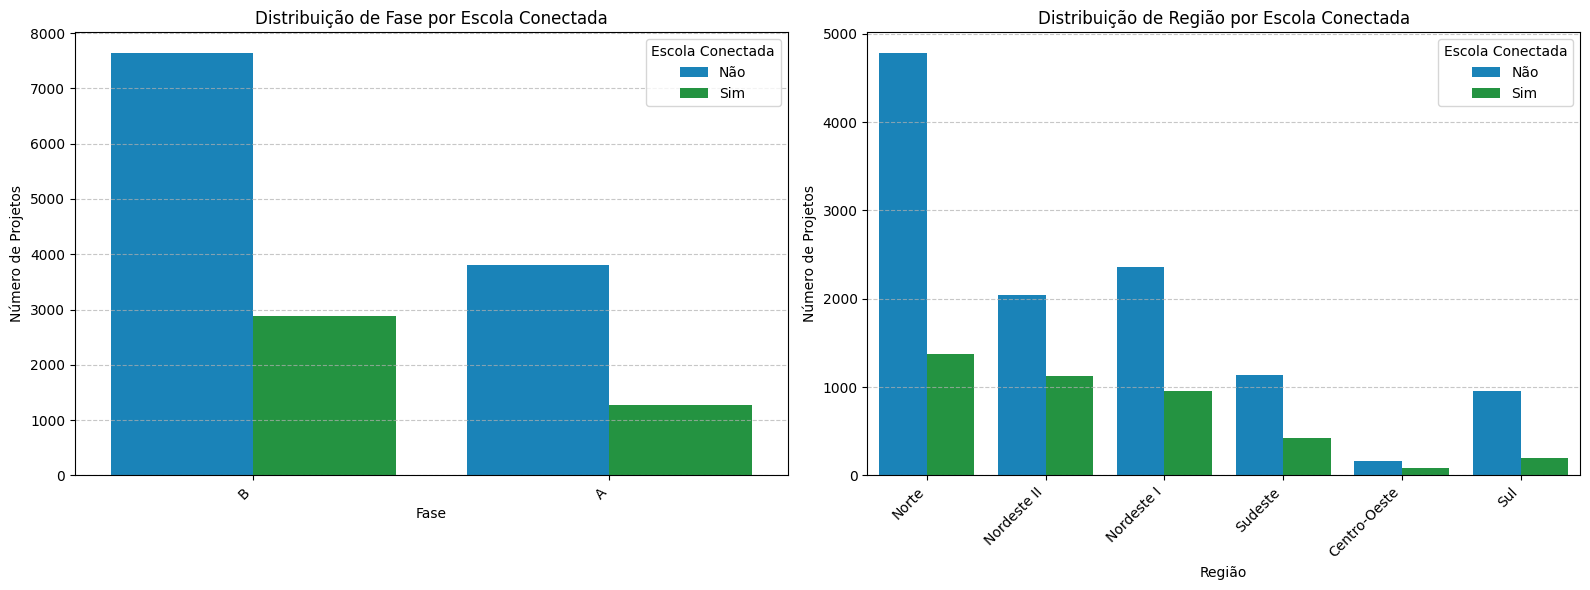

---- Total de Escolas Conectadas por Fase ----
Fase
A    1279
B    2875
Name: Escola Conectada, dtype: int64


---- Total de Escolas Conectadas por Região (Maior para Menor) ----
Região
Norte           1369
Nordeste II     1124
Nordeste I       951
Sudeste          429
Sul              197
Centro-Oeste      84
Name: Escola Conectada, dtype: int64


Plot 4b: Relação Top 10 UFs vs. Escola Conectada (Cores Ajustadas)


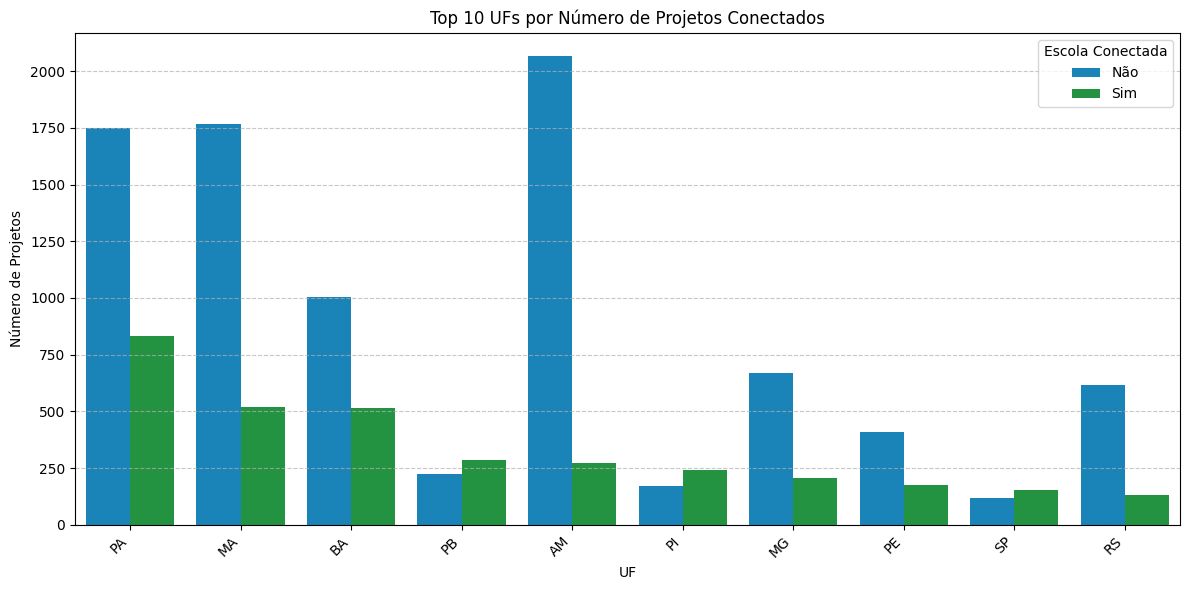

---- TOP 10 Total de Escolas Conectadas por UF ----
UF
PA    834
MA    520
BA    514
PB    287
AM    272
PI    240
MG    206
PE    174
SP    151
RS    133
Name: Escola Conectada, dtype: int64




In [29]:
# Fase e Região

print("Plot 4a: Relação Fase e Região vs. Escola Conectada (Cores Ajustadas)")
categorical_for_plot = ['Fase', 'Região']
plt.figure(figsize=(16, 6))
for i, col in enumerate(categorical_for_plot):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, hue='Escola Conectada', data=df_final, palette=custom_palette) # Aplicando a paleta
    plt.title(f'Distribuição de {col} por Escola Conectada')
    plt.xlabel(col)
    plt.ylabel('Número de Projetos')
    plt.legend(title='Escola Conectada', labels=['Não', 'Sim'])
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("---- Total de Escolas Conectadas por Fase ----")
print(df_final.groupby('Fase')['Escola Conectada'].sum())
print("\n")
print("---- Total de Escolas Conectadas por Região (Maior para Menor) ----")
print(df_final.groupby('Região')['Escola Conectada'].sum().sort_values(ascending=False))
print("\n")


# --- Para UF, vamos plotar as Top 10 UFs com mais projetos conectados ---
print("Plot 4b: Relação Top 10 UFs vs. Escola Conectada (Cores Ajustadas)")
plt.figure(figsize=(12, 6))
top_ufs_connected = df_final[df_final['Escola Conectada'] == 1]['UF'].value_counts().nlargest(10).index
sns.countplot(x='UF', hue='Escola Conectada', data=df_final[df_final['UF'].isin(top_ufs_connected)], palette=custom_palette, # Aplicando a paleta
              order=top_ufs_connected)
plt.title('Top 10 UFs por Número de Projetos Conectados')
plt.xlabel('UF')
plt.ylabel('Número de Projetos')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Escola Conectada', labels=['Não', 'Sim'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("---- TOP 10 Total de Escolas Conectadas por UF ----")
print(df_final.groupby('UF')['Escola Conectada'].sum().nlargest(10))
print("\n")


Matriz de Correlação

Plot 5: Matriz de Correlação


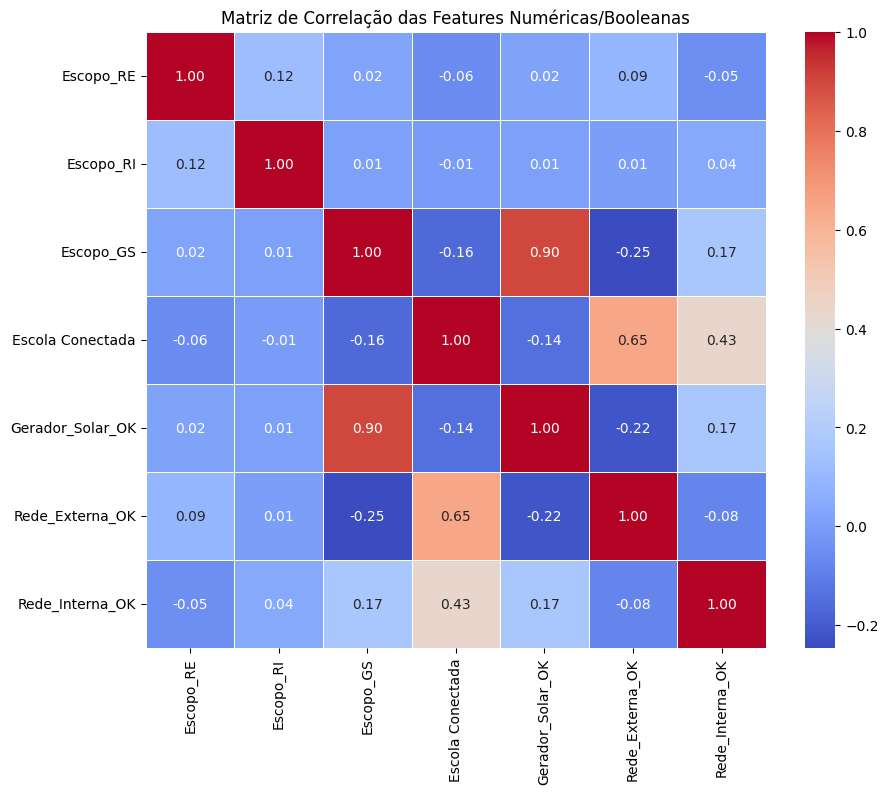

In [30]:
print("Plot 5: Matriz de Correlação")
plt.figure(figsize=(10, 8))
# Selecionando apenas as colunas numéricas/booleanas para a matriz de correlação
numeric_bool_cols = df_final.select_dtypes(include=['int64', 'bool']).columns.tolist()
# Remover 'PROJETO' da correlação
if 'PROJETO' in numeric_bool_cols:
    numeric_bool_cols.remove('PROJETO')

correlation_matrix = df_final[numeric_bool_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Features Numéricas/Booleanas')
plt.show()


## Conclusão

Para esta etapa do trabalho, consegui identificar em ambos DataFrames as necessidades de tratamentos/limpeza e respectivas soluções. Em seguida o cruzamento das tabelas foi bem sucedido, e a visualização dos dados satisfatória, demostrando que o Dataset final está pronto para ser utilizado em Machine Learning.